# Simple Plot - Event - TurnCompassHeading_09022020

# Measurement Data:
NameMoveUsingEncoder

# Import modules

In [86]:
from datetime import datetime, timedelta
import pandas as pd
#%matplotlib inline
#import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Constants relevant for the graphs

In [137]:
colors=['green','darkgreen','yellowgreen','violet','blue','red','black']
linestyles=['--','--','--','-','-','-','-']
markers=['+', "+", '+', '.','.','.','|']  # optional : marker=(8,2,0)

# Specify file to read in

In [138]:
# Configure your input file here:
fileNameTurnToCompassHeading    = "./data/TurnToCompassHeading.csv"

# Create a dataframe from measurement data in csv file
#### Set Time column as the index 

In [139]:
# Read CSV file into a pandas dataframe 
OrigDataFrame   = pd.read_csv(fileNameTurnToCompassHeading);
df = OrigDataFrame.copy()
# Change timestamp to python datatime
df['Time'] = pd.to_datetime(df['Time'], unit='s')
df.set_index('Time',inplace=True)
# Print the first three and last three rows of measurements
df.take([0,1,2,-3,-2,-1])

,pError,iError,dError,Output,preCalculationOutput,Measurement,Setpoint
Time,,,,,,,
1970-01-01 15:59:40,-0.42880,0.0,-0.0,-0.54304,-0.42880,355.759995,270.0
1970-01-01 15:59:57,-0.42895,0.0,-0.0,-0.54316,-0.42895,355.789993,270.0
1970-01-01 16:00:17,-0.42925,0.0,-0.0,-0.54340,-0.42925,355.849991,270.0
1970-01-01 21:18:17,-0.00470,0.0,0.0,-0.20376,-0.00470,0.940002,0.0
1970-01-01 21:18:37,-0.00300,0.0,0.0,-0.20240,-0.00300,0.599991,0.0
1970-01-01 21:18:57,-0.00215,0.0,0.0,-0.20172,-0.00215,0.429993,0.0


# Collect the hour chunks in the data.
#### This is done to ignore the data in the log where there were no measurements.

In [140]:
# Create a list of relevant measurement periods in the data
dfDay= [group[1] for group in df.groupby(df.index.day)]
dfHourList = []
#print("Total days of measuements:", len(dfDay))
for i in range(len(dfDay)):
    dfHour = [group[1] for group in dfDay[i].groupby(dfDay[i].index.hour)]
    for j in range(len(dfHour)):
        #print("Day: ", i, "Hour: ", j)
        dfHourList.append(dfHour[j])
# Show the range of the time stamps
print("The following hour long chunks were idenfied:")
for i in range(len(dfHourList)):
    print("Month ",dfHourList[i].index[0].month,"Day ",dfHourList[i].index[0].day,"Hour ",dfHourList[i].index[0].hour)
print("Total hours", len(dfHourList))

The following hour long chunks were idenfied:
Month  1 Day  1 Hour  15
Month  1 Day  1 Hour  16
Month  1 Day  1 Hour  21
Total hours 3


# Plot the columns during the observational period
### labels = ['pError', 'iError', 'dError']
### timeslices = second

In [154]:
# Configure what you want to see:
#labels=dfHourList[0].columns # Set to whatever columns you want to see or all
#labeliz = ['pError', 'iError', 'dError', 'Output', 'preCalculationOutput','Measurement', 'Setpoint']
labeliz = ['pError', 'iError', 'dError']
dfHourListiz=[dfHourList[1]]  # To see specific hours change this to be = dfHourList
#dfHourListiz=dfHourList   # To see them all hours change this to be = dfHourLis
coloriz=colors
markeriz=markers
linestyleiz=linestyles
resample=0  # 0 or 1

Month  1 Day  1 Hour 16


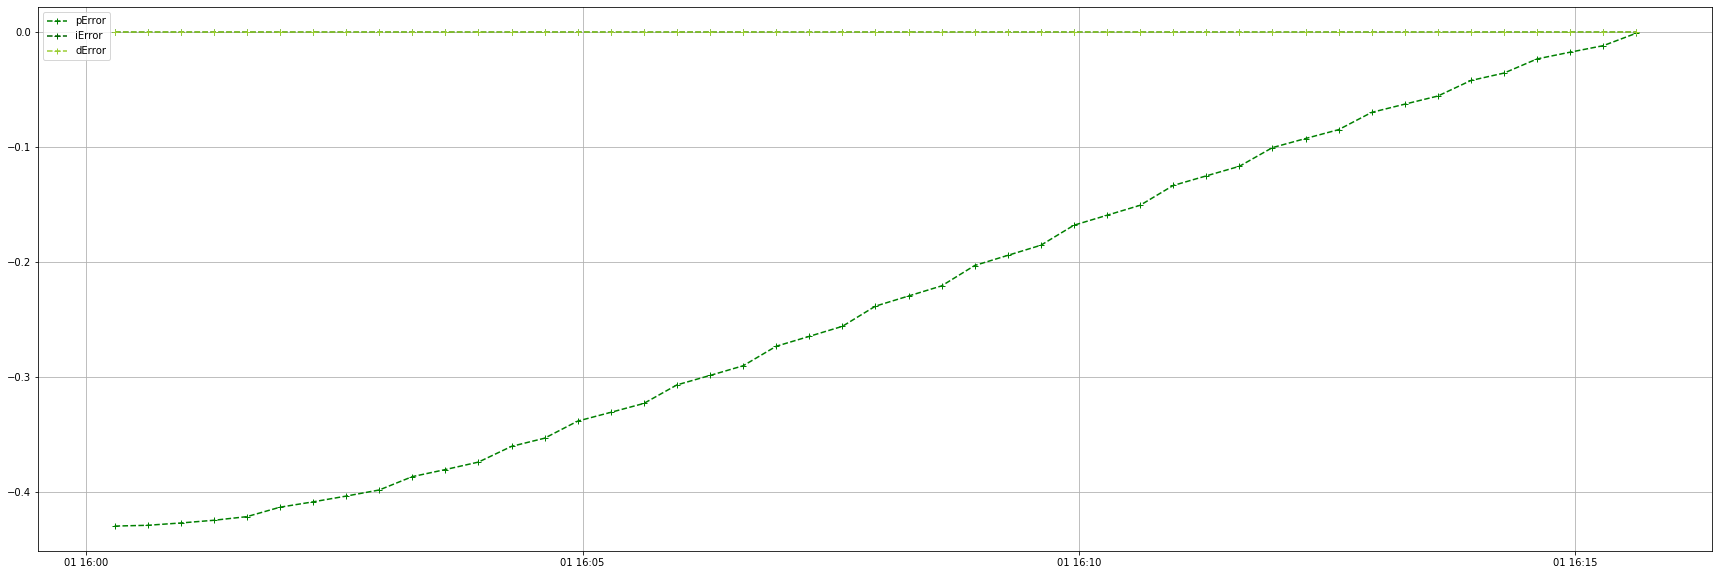

In [155]:
for i in range(len(dfHourListiz)):
    fig=plt.figure(figsize=(30,10))
    ax=fig.add_subplot(111)
    for j in range(len(labeliz)):
        if resample==0:
            #print(labeliz[j],dfHourListiz[i][labeliz[j]])
            ax.plot(dfHourListiz[i].index,dfHourListiz[i][labeliz[j]],c=coloriz[j],marker=markeriz[j],ls=linestyleiz[j],label=labeliz[j],fillstyle='none')
        elif resample==1:
            ax.plot(dfHourListiz[i].resample('s').mean().index,dfHourListiz[i][labelsiz[j]].resample('s').mean(),c=coloriz[j],marker=markeriz[j],ls=labeliz[j],label=labeliz[j],fillstyle='none')
        plt.legend(loc="upper left")  
        plt.grid(True)
    title = print("Month ",dfHourListiz[i].index[0].month,"Day ",dfHourListiz[i].index[0].day,"Hour",dfHourListiz[i].index[0].hour)
    ax.set_title(title)
    plt.show()

# Plot the columns during the observational period
### labels = ['Output', 'preCalculationOutput','Measurement', 'Setpoint']
### slices=second

In [152]:
# Configure what you want to see:
#labels=dfHourList[0].columns # Set to whatever columns you want to see or all
#labeliz = ['pError', 'iError', 'dError', 'Output', 'preCalculationOutput','Measurement', 'Setpoint']
labeliz = ['Output', 'preCalculationOutput','Measurement', 'Setpoint']
dfHourListiz=[dfHourList[1]]  # To see specific hours change this to be = dfHourList
#dfHourListiz=dfHourList   # To see them all hours change this to be = dfHourLis
coloriz=colors
markeriz=markers
linestyleiz=linestyles
resample=0  # 0 or 1

Month  1 Day  1 Hour 16


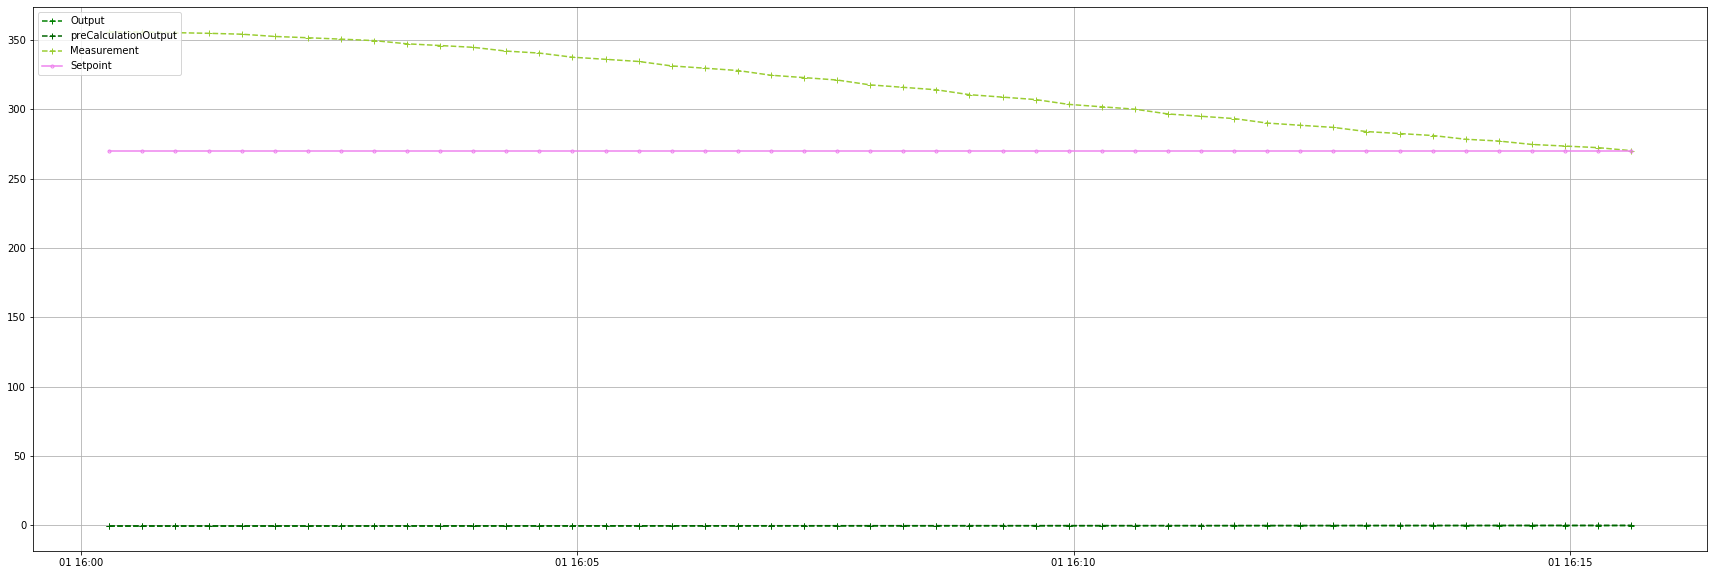

In [153]:
for i in range(len(dfHourListiz)):
    fig=plt.figure(figsize=(30,10))
    ax=fig.add_subplot(111)
    for j in range(len(labeliz)):
        if resample==0:
            #print(labeliz[j],dfHourListiz[i][labeliz[j]])
            ax.plot(dfHourListiz[i].index,dfHourListiz[i][labeliz[j]],c=coloriz[j],marker=markeriz[j],ls=linestyleiz[j],label=labeliz[j],fillstyle='none')
        elif resample==1:
            ax.plot(dfHourListiz[i].resample('s').mean().index,dfHourListiz[i][labelsiz[j]].resample('s').mean(),c=coloriz[j],marker=markeriz[j],ls=labeliz[j],label=labeliz[j],fillstyle='none')
        plt.legend(loc="upper left")  
        plt.grid(True)
    title = print("Month ",dfHourListiz[i].index[0].month,"Day ",dfHourListiz[i].index[0].day,"Hour",dfHourListiz[i].index[0].hour)
    ax.set_title(title)
    plt.show()

# Plot the columns during the observational period
### labels (all)= ['pError', 'iError', 'dError','Output', 'preCalculationOutput','Measurement', 'Setpoint']
### timeslines (all)

In [147]:
# Configure what you want to see:
#labels=dfHourList[0].columns # Set to whatever columns you want to see or all
labeliz = ['pError', 'iError', 'dError', 'Output', 'preCalculationOutput','Measurement', 'Setpoint']
#dfHourListiz=[dfHourList[0]]  # To see specific hours change this to be = dfHourList
dfHourListiz=dfHourList   # To see them all hours change this to be = dfHourLis
coloriz=colors
markeriz=markers
linestyleiz=linestyles
resample=0  # 0 or 1

Month  1 Day  1 Hour 15


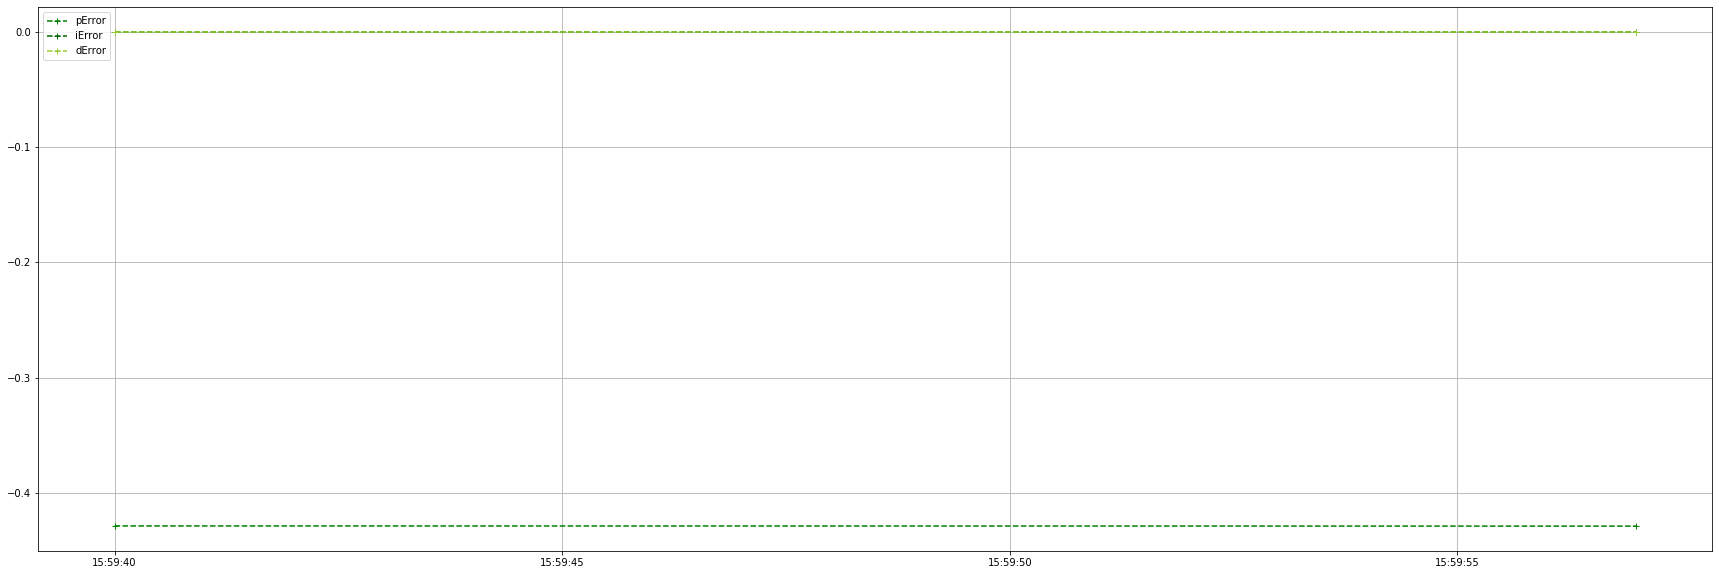

Month  1 Day  1 Hour 16


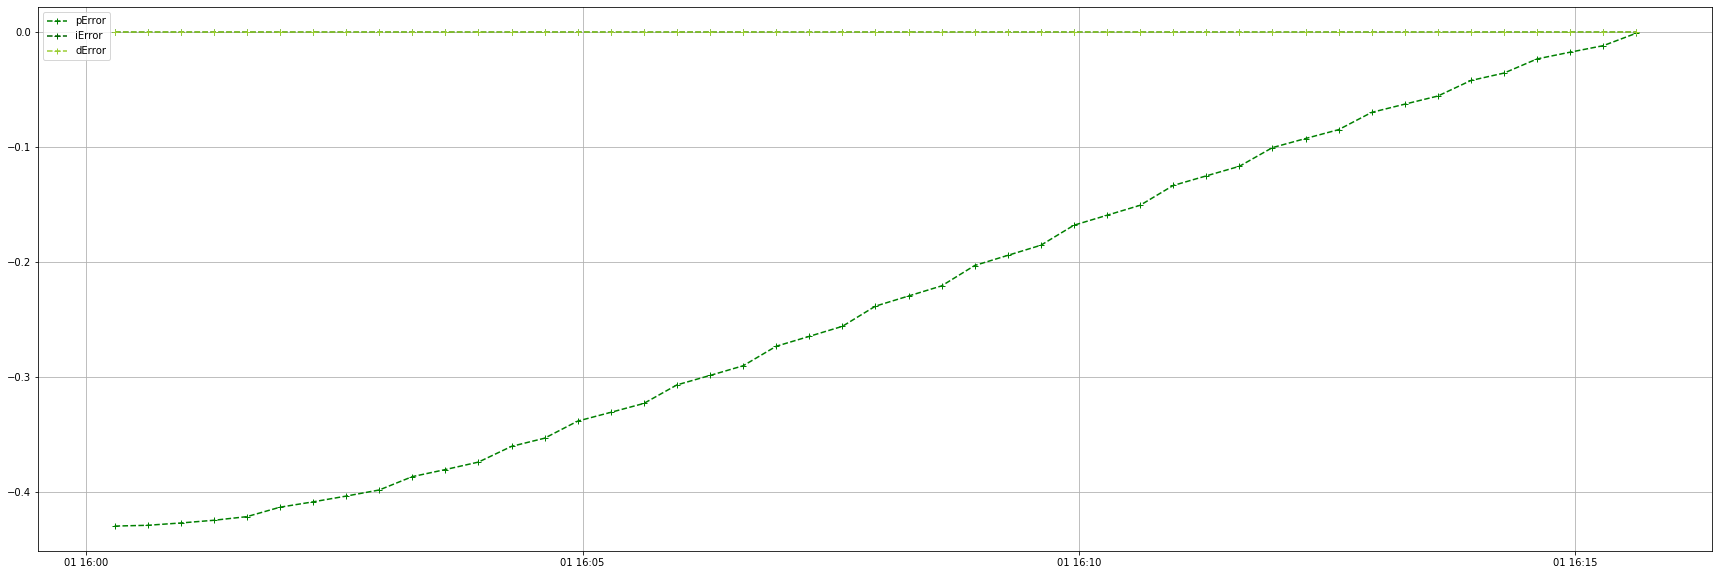

Month  1 Day  1 Hour 21


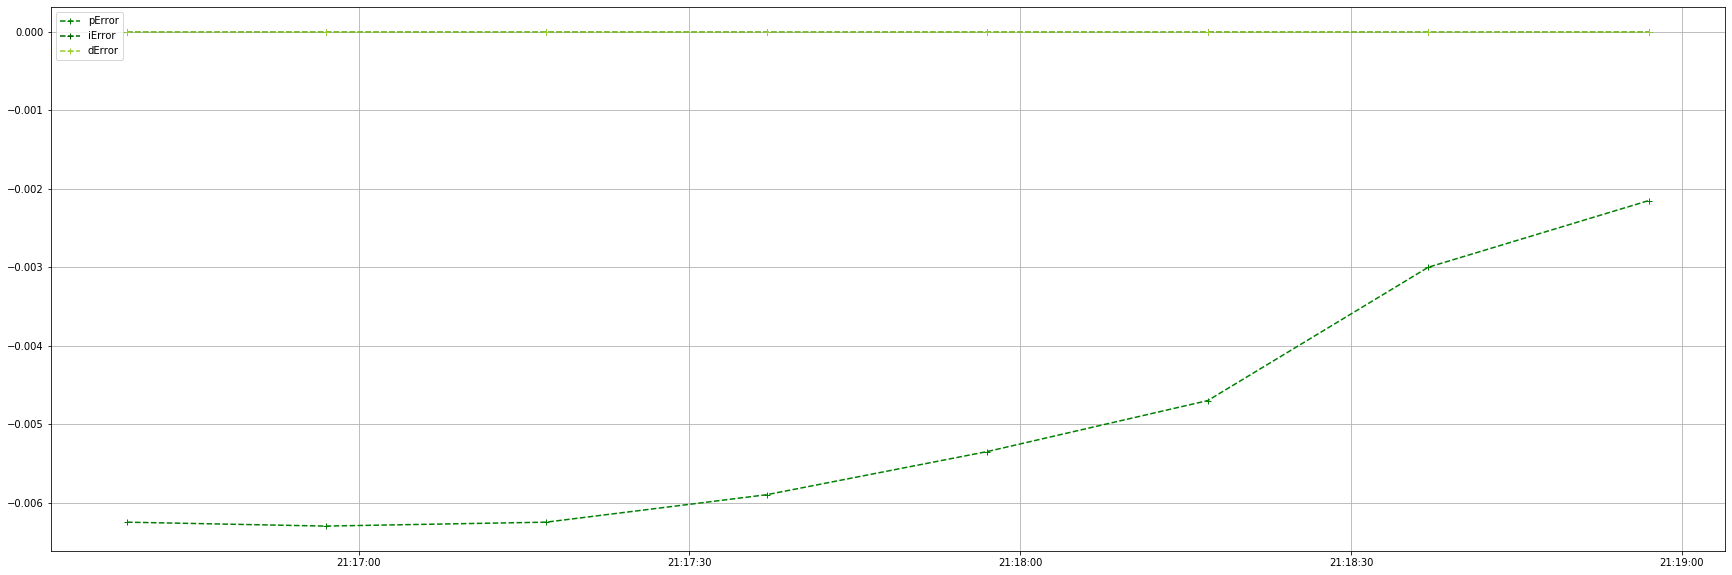

In [146]:
for i in range(len(dfHourListiz)):
    fig=plt.figure(figsize=(30,10))
    ax=fig.add_subplot(111)
    for j in range(len(labeliz)):
        if resample==0:
            #print(labeliz[j],dfHourListiz[i][labeliz[j]])
            ax.plot(dfHourListiz[i].index,dfHourListiz[i][labeliz[j]],c=coloriz[j],marker=markeriz[j],ls=linestyleiz[j],label=labeliz[j],fillstyle='none')
        elif resample==1:
            ax.plot(dfHourListiz[i].resample('s').mean().index,dfHourListiz[i][labelsiz[j]].resample('s').mean(),c=coloriz[j],marker=markeriz[j],ls=labeliz[j],label=labeliz[j],fillstyle='none')
        plt.legend(loc="upper left")  
        plt.grid(True)
    title = print("Month ",dfHourListiz[i].index[0].month,"Day ",dfHourListiz[i].index[0].day,"Hour",dfHourListiz[i].index[0].hour)
    ax.set_title(title)
    plt.show()